## Grad-CAM class activation visualization

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model_builder = keras.applications.inception_resnet_v2.InceptionResNetV2

preprocess_input = keras.applications.inception_resnet_v2.preprocess_input
decode_predictions = keras.applications.inception_resnet_v2.decode_predictions

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import preprocess_input

image_size = 299
batch_size = 1
valid_size = 1
# 학습 및 검증 데이터용 ImageDataGenerator 생성해 놓기 
train_datagen = ImageDataGenerator(rescale=1./255., 
                                   validation_split = 0.20)

#검증데이터는 정규화 외에 따로 조정 없음 
valid_datagen = ImageDataGenerator(rescale=1./255., 
                                   validation_split = 0.20)

#flow_from_directory()는 앞서 배운 flow()와 비슷, 단 경로를 통채로 가져올 수 있음 
# seed 값이 같으므로 train subset과 validation subset이 중복될 일은 없다.
# batch_size = 32, shuffle=True이므로 랜덤하게 32개의 이미지를 디렉토리에서 골라서 보강하여 반환한다.
train_generator = train_datagen.flow_from_directory(directory = '/content/drive/My Drive/인공지능 학습관련/covid데이터', #저장 경로 
                                                    subset = 'training',   
                                                    batch_size = batch_size,
                                                    seed = 126,
                                                    shuffle = True,
                                                    class_mode = 'categorical',
                                                    target_size = (image_size,image_size))

valid_generator = valid_datagen.flow_from_directory(directory = '/content/drive/My Drive/인공지능 학습관련/covid데이터',
                                                    subset = 'validation',
                                                    batch_size = valid_size,
                                                    seed = 126,
                                                    shuffle = True,
                                                    class_mode = 'categorical',
                                                    target_size = (image_size,image_size))
print(train_generator.n)
print(valid_generator.n)


Found 9076 images belonging to 3 classes.
Found 2268 images belonging to 3 classes.
9076
2268


In [ ]:
# Make model == feature model
base_model = keras.applications.inception_resnet_v2.InceptionResNetV2(weights="imagenet", include_top=False)

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
base_model.save('/content/drive/My Drive/인공지능 학습관련/feature_model229.h5')

In [ ]:
import numpy as np
from tqdm import tqdm

train_features = [] # 빈 리스트 생성 
train_Y = [] # 빈 리스트 생성 

for idx in tqdm(range(train_generator.n)): # 2785 
    if idx % 100 == 0: #만약 0 포함 100의 배수일때 
        print(idx) #(진행상황 표기)
    x, y = train_generator.next() #next()를 활용하여 train_generator에 담겨진 [[입력픽셀],[라벨링]] 을 x와 y에 담아 준다.  
    train_Y.extend(y) #append()와 비슷한 기능, list에 appending 수행
    #   print(x.shape, y.shape) --> (32, 299, 299, 3), (32, 120)
    # feature_model : 이미 학습이 완료된 특징 추출기 (우리가 불러옴)
    # 학습데이터 x 를 활용해서 feature_model을 통과시켜 특징 추출.
    feature = base_model.predict(x)
    #   print(feature.shape) --> (32,2048)
    train_features.extend(feature)

#array 전환 
train_features = np.array(train_features)
train_Y = np.array(train_Y)

print(train_features.shape)
print(train_Y.shape) 

  0%|          | 0/9076 [00:00<?, ?it/s]

0


  1%|          | 100/9076 [01:26<2:15:39,  1.10it/s]

100


  2%|▏         | 200/9076 [02:35<1:55:31,  1.28it/s]

200


  3%|▎         | 300/9076 [03:44<1:56:56,  1.25it/s]

300


  4%|▍         | 400/9076 [04:51<1:31:56,  1.57it/s]

400


  6%|▌         | 500/9076 [05:58<1:24:53,  1.68it/s]

500


  7%|▋         | 600/9076 [07:07<1:48:29,  1.30it/s]

600


  8%|▊         | 700/9076 [08:14<1:37:56,  1.43it/s]

700


  9%|▉         | 800/9076 [09:23<1:38:54,  1.39it/s]

800


 10%|▉         | 900/9076 [10:31<1:42:05,  1.33it/s]

900


 11%|█         | 1000/9076 [11:38<1:24:45,  1.59it/s]

1000


 12%|█▏        | 1100/9076 [12:46<1:37:32,  1.36it/s]

1100


 13%|█▎        | 1200/9076 [13:53<1:17:19,  1.70it/s]

1200


 14%|█▍        | 1300/9076 [14:57<1:21:39,  1.59it/s]

1300


 15%|█▌        | 1400/9076 [16:07<1:27:51,  1.46it/s]

1400


 17%|█▋        | 1500/9076 [17:16<1:51:27,  1.13it/s]

1500


 18%|█▊        | 1600/9076 [18:21<1:38:46,  1.26it/s]

1600


 19%|█▊        | 1700/9076 [19:26<2:03:38,  1.01s/it]

1700


 20%|█▉        | 1800/9076 [20:36<1:28:11,  1.38it/s]

1800


 21%|██        | 1900/9076 [21:41<1:25:23,  1.40it/s]

1900


 22%|██▏       | 2000/9076 [22:48<1:05:14,  1.81it/s]

2000


 23%|██▎       | 2100/9076 [24:00<1:29:15,  1.30it/s]

2100


 24%|██▍       | 2200/9076 [25:08<1:17:33,  1.48it/s]

2200


 25%|██▌       | 2300/9076 [26:16<1:31:11,  1.24it/s]

2300


 26%|██▋       | 2400/9076 [27:23<1:07:11,  1.66it/s]

2400


 28%|██▊       | 2500/9076 [28:33<1:06:24,  1.65it/s]

2500


 29%|██▊       | 2600/9076 [29:46<1:06:41,  1.62it/s]

2600


 30%|██▉       | 2700/9076 [30:53<57:49,  1.84it/s]  

2700


 31%|███       | 2800/9076 [32:02<1:05:43,  1.59it/s]

2800


 32%|███▏      | 2900/9076 [33:10<1:07:08,  1.53it/s]

2900


 33%|███▎      | 3000/9076 [34:20<1:09:25,  1.46it/s]

3000


 34%|███▍      | 3100/9076 [35:27<1:18:39,  1.27it/s]

3100


 35%|███▌      | 3200/9076 [36:50<1:22:45,  1.18it/s]

3200


 36%|███▋      | 3300/9076 [38:16<1:05:17,  1.47it/s]

3300


 37%|███▋      | 3400/9076 [39:23<1:23:07,  1.14it/s]

3400


 39%|███▊      | 3500/9076 [40:30<56:17,  1.65it/s]

3500


 40%|███▉      | 3600/9076 [41:40<56:32,  1.61it/s]

3600


 41%|████      | 3700/9076 [42:52<1:07:32,  1.33it/s]

3700


 42%|████▏     | 3800/9076 [44:00<1:11:55,  1.22it/s]

3800


 43%|████▎     | 3900/9076 [45:08<50:55,  1.69it/s]

3900


 44%|████▍     | 4000/9076 [46:18<51:22,  1.65it/s]

4000


 45%|████▌     | 4100/9076 [47:26<56:05,  1.48it/s]

4100


 46%|████▋     | 4200/9076 [48:36<54:17,  1.50it/s]

4200


 47%|████▋     | 4300/9076 [49:46<52:56,  1.50it/s]

4300


 48%|████▊     | 4400/9076 [50:52<46:06,  1.69it/s]

4400


 50%|████▉     | 4500/9076 [52:07<50:48,  1.50it/s]

4500


 51%|█████     | 4600/9076 [53:42<54:32,  1.37it/s]

4600


 52%|█████▏    | 4700/9076 [54:54<56:38,  1.29it/s]

4700


 53%|█████▎    | 4800/9076 [56:04<57:07,  1.25it/s]  

4800


 54%|█████▍    | 4900/9076 [57:12<44:02,  1.58it/s]

4900


 55%|█████▌    | 5000/9076 [58:21<44:36,  1.52it/s]

5000


 56%|█████▌    | 5100/9076 [59:30<45:03,  1.47it/s]

5100


 57%|█████▋    | 5200/9076 [1:00:44<37:22,  1.73it/s]

5200


 58%|█████▊    | 5300/9076 [1:01:50<41:45,  1.51it/s]

5300


 59%|█████▉    | 5400/9076 [1:03:00<38:21,  1.60it/s]

5400


 61%|██████    | 5500/9076 [1:04:06<33:50,  1.76it/s]

5500


 62%|██████▏   | 5600/9076 [1:05:13<32:56,  1.76it/s]

5600


 63%|██████▎   | 5700/9076 [1:06:25<58:39,  1.04s/it]

5700


 64%|██████▍   | 5800/9076 [1:07:35<37:10,  1.47it/s]

5800


 65%|██████▌   | 5900/9076 [1:08:43<44:32,  1.19it/s]

5900


 66%|██████▌   | 6000/9076 [1:09:54<38:33,  1.33it/s]

6000


 67%|██████▋   | 6100/9076 [1:11:04<33:20,  1.49it/s]

6100


 68%|██████▊   | 6200/9076 [1:12:08<33:06,  1.45it/s]

6200


 69%|██████▉   | 6300/9076 [1:13:16<28:50,  1.60it/s]

6300


 71%|███████   | 6400/9076 [1:14:22<26:13,  1.70it/s]

6400


 72%|███████▏  | 6500/9076 [1:15:30<27:09,  1.58it/s]

6500


 73%|███████▎  | 6600/9076 [1:16:38<27:24,  1.51it/s]

6600


 74%|███████▍  | 6700/9076 [1:17:50<34:53,  1.14it/s]

6700


 75%|███████▍  | 6800/9076 [1:18:59<25:26,  1.49it/s]

6800


 76%|███████▌  | 6900/9076 [1:20:07<27:12,  1.33it/s]

6900


 77%|███████▋  | 7000/9076 [1:21:15<22:15,  1.55it/s]

7000


 78%|███████▊  | 7100/9076 [1:22:23<25:08,  1.31it/s]

7100


 79%|███████▉  | 7200/9076 [1:23:32<19:44,  1.58it/s]

7200


 80%|████████  | 7300/9076 [1:24:40<20:48,  1.42it/s]

7300


 82%|████████▏ | 7400/9076 [1:25:45<17:14,  1.62it/s]

7400


 83%|████████▎ | 7500/9076 [1:26:52<16:11,  1.62it/s]

7500


 84%|████████▎ | 7600/9076 [1:27:56<16:48,  1.46it/s]

7600


 85%|████████▍ | 7700/9076 [1:29:02<16:31,  1.39it/s]

7700


 86%|████████▌ | 7800/9076 [1:30:09<15:32,  1.37it/s]

7800


 87%|████████▋ | 7900/9076 [1:31:15<11:52,  1.65it/s]

7900


 88%|████████▊ | 8000/9076 [1:32:25<12:57,  1.38it/s]

8000


 89%|████████▉ | 8100/9076 [1:33:32<09:56,  1.64it/s]

8100


 90%|█████████ | 8200/9076 [1:34:41<22:05,  1.51s/it]

8200


 91%|█████████▏| 8300/9076 [1:35:47<07:41,  1.68it/s]

8300


 93%|█████████▎| 8400/9076 [1:36:54<07:52,  1.43it/s]

8400


 94%|█████████▎| 8500/9076 [1:37:59<05:46,  1.66it/s]

8500


 95%|█████████▍| 8600/9076 [1:39:06<06:08,  1.29it/s]

8600


 96%|█████████▌| 8700/9076 [1:40:12<03:54,  1.60it/s]

8700


 97%|█████████▋| 8800/9076 [1:41:19<03:11,  1.44it/s]

8800


 98%|█████████▊| 8900/9076 [1:42:24<01:55,  1.53it/s]

8900


 99%|█████████▉| 9000/9076 [1:43:36<01:39,  1.31s/it]

9000


100%|██████████| 9076/9076 [1:44:30<00:00,  1.45it/s]


(9076, 8, 8, 1536)
(9076, 3)


In [ ]:
valid_features = [] # 빈 리스트 생성 
valid_Y = [] # 빈 리스트 생성 
from tqdm import tqdm

for idx in tqdm(range(valid_generator.n)): ## valid_generator.n = 696 (검증데이터의 수)
    if idx % 100 == 0: #만약 0 포함 100의 배수일때 
        print(idx) #(진행상황 표기)
    x, y = valid_generator.next() #next()를 활용하여 valid_generator에 담겨진 [[입력픽셀],[라벨링]] 을 x와 y에 담아 준다.   
    valid_Y.extend(y) #append()와 비슷한 기능, list에 appending 수행
  
    # feature_model : 이미 학습이 완료된 특징 추출기 (우리가 불러옴)
    # 학습데이터 x 를 활용해서 feature_model을 통과시켜 특징 추출.
    feature = base_model.predict(x)
    valid_features.extend(feature)

#array 전환 
valid_features = np.array(valid_features)
valid_Y = np.array(valid_Y)

print(valid_features.shape)
print(valid_Y.shape)

  0%|          | 0/2268 [00:00<?, ?it/s]

0


  4%|▍         | 100/2268 [01:05<23:26,  1.54it/s]

100


  9%|▉         | 200/2268 [02:10<20:22,  1.69it/s]

200


 13%|█▎        | 300/2268 [03:14<19:36,  1.67it/s]

300


 18%|█▊        | 400/2268 [04:20<18:50,  1.65it/s]

400


 22%|██▏       | 500/2268 [05:23<17:20,  1.70it/s]

500


 26%|██▋       | 600/2268 [06:24<16:18,  1.70it/s]

600


 31%|███       | 700/2268 [07:28<17:07,  1.53it/s]

700


 35%|███▌      | 800/2268 [08:30<14:41,  1.67it/s]

800


 40%|███▉      | 900/2268 [09:35<13:25,  1.70it/s]

900


 44%|████▍     | 1000/2268 [10:39<12:02,  1.76it/s]

1000


 49%|████▊     | 1100/2268 [11:44<13:49,  1.41it/s]

1100


 53%|█████▎    | 1200/2268 [12:52<10:47,  1.65it/s]

1200


 57%|█████▋    | 1300/2268 [14:02<08:51,  1.82it/s]

1300


 62%|██████▏   | 1400/2268 [15:06<08:43,  1.66it/s]

1400


 66%|██████▌   | 1500/2268 [16:43<08:05,  1.58it/s]

1500


 71%|███████   | 1600/2268 [17:47<07:15,  1.53it/s]

1600


 75%|███████▍  | 1700/2268 [18:49<06:02,  1.57it/s]

1700


 79%|███████▉  | 1800/2268 [19:52<04:53,  1.59it/s]

1800


 84%|████████▍ | 1900/2268 [21:00<04:02,  1.52it/s]

1900


 88%|████████▊ | 2000/2268 [22:05<03:19,  1.34it/s]

2000


 93%|█████████▎| 2100/2268 [23:08<01:45,  1.59it/s]

2100


 97%|█████████▋| 2200/2268 [24:12<00:40,  1.67it/s]

2200


100%|██████████| 2268/2268 [24:56<00:00,  1.52it/s]


(2268, 8, 8, 1536)
(2268, 3)


In [ ]:
# Make Classifier Model
def create_model():
    input = Input(shape=base_model.output.shape[1:])

    x = GlobalAveragePooling2D()(input)

    x = Dense(512, activation='relu')(x)

    x = tf.keras.layers.Dropout(0.4)(x)

    predictions = Dense(3, activation='softmax')(x)

    model = Model(inputs=input, outputs=predictions)
    model.compile(tf.optimizers.RMSprop(0.0001), 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
    return model


# 모델 객체를 만듬
model = create_model()

checkpoint_path = '/content/drive/My Drive/인공지능 학습관련/covid19_detection_model'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_accuracy',
                                verbose=1)

es = EarlyStopping(patience=50, verbose=1)
history = model.fit(train_features, train_Y, 
                    validation_data=(valid_features, valid_Y),
                    epochs = 100,
                    batch_size = 32,
                    callbacks=[es,cp])
model.summary()

Epoch 1/100
277/284 [============================>.] - ETA: 0s - loss: 0.2672 - accuracy: 0.9051
Epoch 00001: val_accuracy improved from -inf to 0.94665, saving model to /content/drive/My Drive/인공지능 학습관련/covid19_detection_model
284/284 [==============================] - 3s 11ms/step - loss: 0.2667 - accuracy: 0.9050 - val_loss: 0.1522 - val_accuracy: 0.9466
Epoch 2/100
282/284 [============================>.] - ETA: 0s - loss: 0.1511 - accuracy: 0.9451
Epoch 00002: val_accuracy did not improve from 0.94665
284/284 [==============================] - 2s 8ms/step - loss: 0.1505 - accuracy: 0.9455 - val_loss: 0.1486 - val_accuracy: 0.9462
Epoch 3/100
280/284 [============================>.] - ETA: 0s - loss: 0.1320 - accuracy: 0.9556
Epoch 00003: val_accuracy improved from 0.94665 to 0.95988, saving model to /content/drive/My Drive/인공지능 학습관련/covid19_detection_model
284/284 [==============================] - 2s 8ms/step - loss: 0.1326 - accuracy: 0.9554 - val_l

In [ ]:
# model.save('/content/drive/My Drive/인공지능 학습관련/covid_model_size299.h5')

In [ ]:
model2 = create_model()
# 가중치 로드
model2.load_weights(checkpoint_path)

# 모델 평가
print(model2.evaluate(valid_features, valid_Y))

71/71 [==============================] - 0s 6ms/step - loss: 0.0500 - accuracy: 0.9903
[0.04996200278401375, 0.9902998208999634]


In [ ]:
# model2.save('/content/drive/My Drive/인공지능 학습관련/covid_model_size299_best.h5')

In [131]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

# last_conv_layer_model == feature_model
def make_gradcam_heatmap(img_array, classifier_model, last_conv_layer_model):
    
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# gamma correction 
def gamma_correction(img, c=1, g=2.2): 
    out = img.copy() 
    out /= 255. 
    out = (1/c * out) ** (1/g) 
    out *= 255 
    out = out.astype(np.uint8) 
    return out 
# # Read image 
# img = cv2.imread("assets/imori_gamma.jpg").astype(np.float)
# # Gammma correction 
# out = gamma_correction(img)


def show_CAM(img_path, heatmap):
    # We load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("YlOrRd")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    
    # gamma correction
    jet_heatmap = gamma_correction(jet_heatmap, g=2.2)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    save_path = "CXR_cam.jpg"
    superimposed_img.save(save_path)

    # Display Grad CAM
    display(Image(save_path))


[8.3600781e-07 7.4469748e-15 9.9999917e-01]
PNEUMONIA


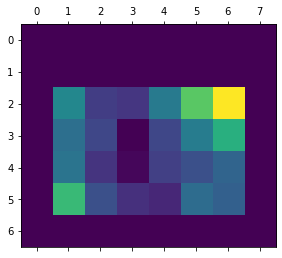

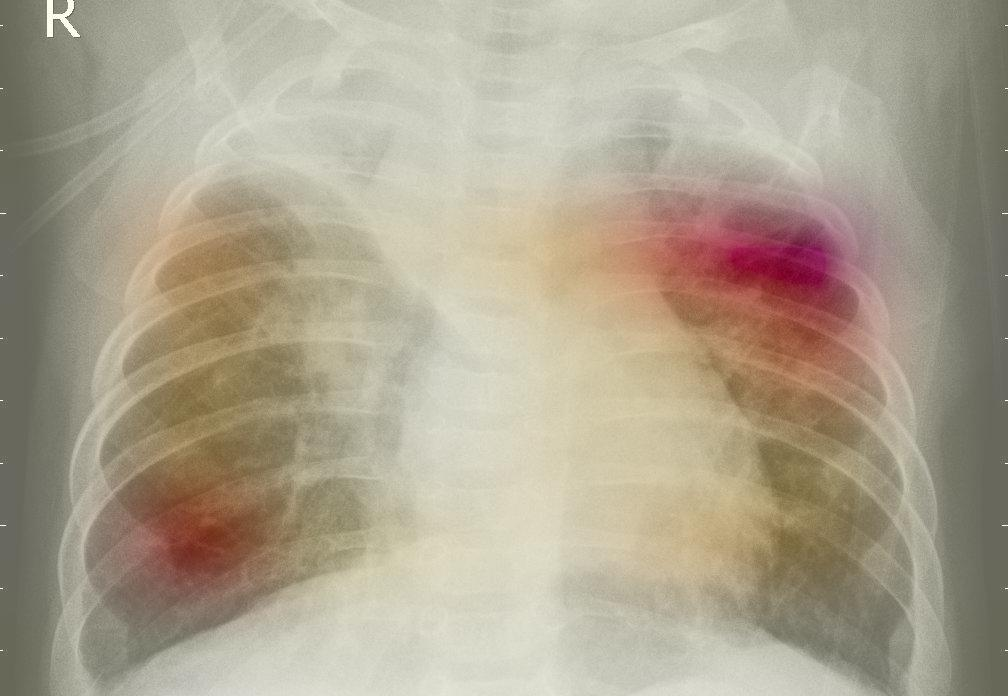

In [163]:
import matplotlib.cm as cm

img_size = (299, 299)
# The local path to our target image
img_path = random.choice(valid_generator.filepaths)

# prediction
Predict_CXR(img_path)

img_array = preprocess_input(get_img_array(img_path, size=img_size))
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, base_model)

# 보정 -- 이미지의 최 외곽부 모두 0
a = np.vstack((np.zeros(heatmap[:2].shape),heatmap[2:-1]))
a = np.vstack((a[:-1],np.zeros(heatmap[-1:].shape)))
for i in a:
    i[0] = 0
    i[-1] = 0

heatmap = a
# Display heatmap
plt.matshow(heatmap)
plt.show()


# Calss Activation Map with image
show_CAM(img_path, heatmap)





In [ ]:
# 한번에 하나의 이미지만 예측할 수 있다.
# 모델을 함수 밖에서 불러온다면? --> 함수 실행시마다 불러오지 않고 한 번 불러오면 계속 사용가능.
# views.py 에서 이미 모델과 피쳐모델이 불려져 있다면 바로 이 함수를 실행시킬 수 있다.
def Predict_CXR(image_path):
    
    # 이미지를 불러옴
    img = cv2.imread(image_path)
    # 이미지 크기를 모델에 맞게 조정
    img = cv2.resize(img, dsize=(299,299))
    # 이미지 픽셀값 스케일링
    img = img / 255.0
    # 이미지 차원 확장 (224,224,3) -> (1,224,224,3)  : feature_model에 넣기위함
    img = np.expand_dims(img, axis=0)
    # feature_model에서 feature 추출
    feature_vector = base_model.predict(img)
    # 앞서 생성한 model 분류기를 통해 예측 수행
    prediction = model.predict(feature_vector)[0]
    print(prediction)
    
    unique_sorted_Y = ['COVID','NORMAL','PNEUMONIA']
    #확률의 예측값을 5개 선출 
    # 가장 예측값이 높은 인덱스를 반환
    index = prediction.argmax()

    # labels에 저장 
    label = unique_sorted_Y[index]
    print(label)


# Predict_CXR('/content/drive/My Drive/인공지능 학습관련/COVID-19 Radiography Database/data/COVID-19/COVID-19 (10).png')
Predict_CXR(img_path)

[4.3905861e-09 4.6163862e-10 1.0000000e+00]
PNEUMONIA


In [63]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/인공지능 학습관련/covid_model_size299_best.h5')
feature_model = load_model('/content/drive/My Drive/인공지능 학습관련/feature_model299.h5')

In [64]:
import random
import cv2

predictY = []
realY = []
iter = 100


unique_sorted_Y = ['COVID','NORMAL','PNEUMONIA']
plt.figure(figsize=(16,iter*3))



for i in range(iter): 
    image_path = random.choice(valid_generator.filepaths)
    #출력 범위 설정 
    plt.subplot(iter,2,i*2+1)

    #검증데이터 출력 
    plt.imshow(plt.imread(image_path))

    # split('/')를 통해 나눠진 부분 중 3번째 획득
    real_y = image_path.split('/')[-2]
    # real_y → bluetick 출력 
    #타이틀 출력 
    plt.title(real_y)
    plt.axis('off')
    #unique_sorted_Y 에 저장된 값을 바탕으로 real_y의 위치 값 할당 
    idx = unique_sorted_Y.index(real_y)
    # idx → ex) 81, ...  

    


    #예측값 표기
    plt.subplot(iter,2,i * 2+2)
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(299,299))
    img = img / 255.0
    #차원 추가 (axis=0이 되면 1이 추가됨.(299,299,3)→(1,299,299,3))
    img = np.expand_dims(img, axis=0)

    #img를 Inception V3의 특징 추출기 feature_model을 활용하여 특징 벡터를 생성. 
    feature_vector = feature_model.predict(img)

    # 앞서 생성한 model 분류기를 통해 예측 수행
    prediction = model.predict(feature_vector)[0]

    #가장 높은 확률의 예측값을 5개 선출 
    #[::-1] Extended Slices 기법으로 내림차순으로 변경, [:5] 그 중 top 5개
    top_3_predict = prediction.argsort()[::-1][:3]
    #labels에 저장 
    labels = [unique_sorted_Y[index] for index in top_3_predict]
    color = ['gray'] * 3
    #예측 수행한 Top 5 값에 대하여 'blue' 으로 변경
    if idx in top_3_predict:
        color[top_3_predict.tolist().index(idx)] = 'blue'
    color = color[::-1]
    #가로 막대 그리기 
    plt.barh(range(3), prediction[top_3_predict][::-1] * 100, color = color)
    plt.yticks(range(3), labels[::-1])

    # print(labels[0], realY[0])
    predictY.append(labels[0])
    realY.append(real_y)
    print(labels[0],real_y)

Output hidden; open in https://colab.research.google.com to view.

In [68]:
# 글자만.
import random
import cv2

predictY = []
realY = []
iter = 100


unique_sorted_Y = ['COVID','NORMAL','PNEUMONIA']

for i in range(iter): 
    image_path = random.choice(valid_generator.filepaths)
    # split('/')를 통해 나눠진 부분 중 3번째 획득
    real_y = image_path.split('/')[-2]
    # real_y → bluetick 출력 

    idx = unique_sorted_Y.index(real_y)
    # idx → ex) 81, ...  

    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(299,299))
    img = img / 255.0
    #차원 추가 (axis=0이 되면 1이 추가됨.(299,299,3)→(1,299,299,3))
    img = np.expand_dims(img, axis=0)

    #img를 Inception V3의 특징 추출기 feature_model을 활용하여 특징 벡터를 생성. 
    feature_vector = feature_model.predict(img)

    # 앞서 생성한 model 분류기를 통해 예측 수행
    prediction = model.predict(feature_vector)[0]

    #가장 높은 확률의 예측값을 5개 선출 
    #[::-1] Extended Slices 기법으로 내림차순으로 변경, [:5] 그 중 top 5개
    predict = prediction.argmax()
    #labels에 저장 
    label = unique_sorted_Y[predict] 
    
    # print(labels[0], realY[0])
    predictY.append(label)
    realY.append(real_y)
    print(label,real_y)

NORMAL NORMAL
NORMAL NORMAL
PNEUMONIA PNEUMONIA
NORMAL NORMAL
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
COVID COVID
NORMAL NORMAL
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
COVID COVID
PNEUMONIA PNEUMONIA
NORMAL NORMAL
COVID COVID
NORMAL NORMAL
NORMAL NORMAL
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
NORMAL NORMAL
PNEUMONIA PNEUMONIA
COVID COVID
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
NORMAL NORMAL
COVID COVID
PNEUMONIA PNEUMONIA
NORMAL NORMAL
NORMAL NORMAL
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
NORMAL NORMAL
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
COVID COVID
NORMAL NORMAL
NORMAL NORMAL
COVID COVID
COVID COVID
NORMAL NORMAL
NORMAL NORMAL
PNEUMONIA PNEUMONIA
COVID NORMAL
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
NORMAL NORMAL
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
NORMAL NORMAL
PNEUMONIA PNEUMONIA
COVID COVID
COVID COVID
COVID COVID
PNEUMONIA PNEUMONIA
PNEUMONIA PNEUMONIA
NORMAL NORMAL
NORMAL NO

Confusion matrix, without normalization
[[15  1  0]
 [ 0 38  0]
 [ 0  0 46]]


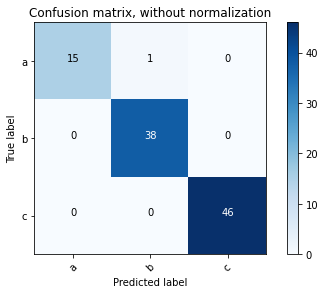

In [69]:
import itertools
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(predictY, realY)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.figure()
plot_confusion_matrix(cm, classes=['a', 'b', 'c'], title='Confusion matrix, without normalization')